# data preprocessing

# Step-1: importing required libraries

In [ ]:
#NAME:BATHULA GURU SUBHASH
#REG:21BCE9056

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step-2: importing the dataset

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step-3: checking and handling null values

In [6]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
#we can say from above information that columns AGE,CABIN and EMBRAKED have null values present in them. we can handle the null values in 3 different ways 1.by deleting them 2.by deleting entire row/column 3.by
#replacing with mean or median

In [7]:
# as age is numerical data so we used mean to replace the null values.
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Age"]
df["Age"].isnull().any()

False

In [9]:
#as there are so many null values in cabin we can delete that column

In [11]:
df1=df.drop("Cabin",axis='columns')

In [12]:
# as embraked is categorical data we can use mode to replace the null values
df1["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)
df1["Embarked"].isnull().any()

False

In [13]:
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [14]:
corr=df1.corr()
corr

C:\Users\DELL\AppData\Local\Temp\ipykernel_4188\3841727755.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df1.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

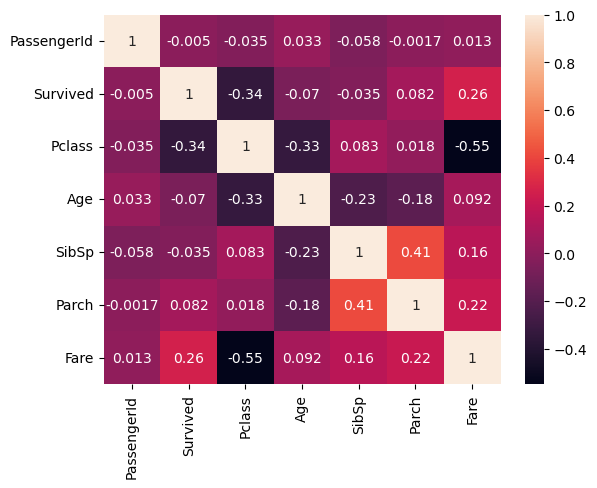

In [15]:
sns.heatmap(corr,annot=True)

# Step-4: data visualization

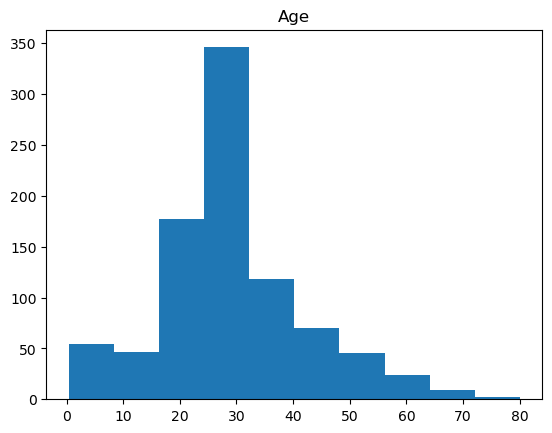

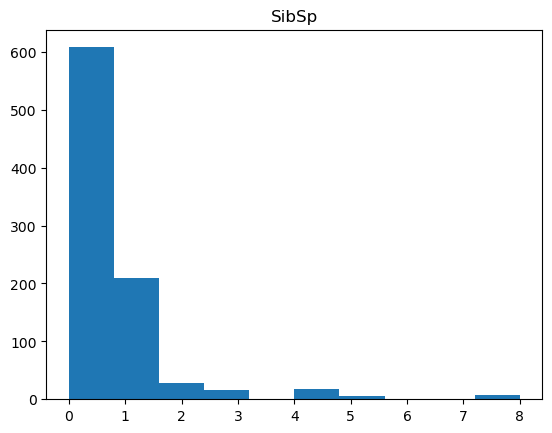

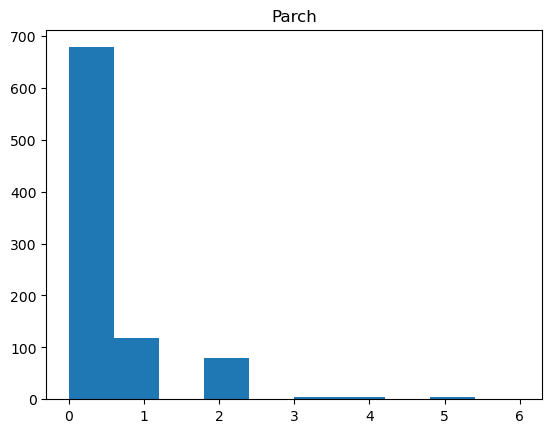

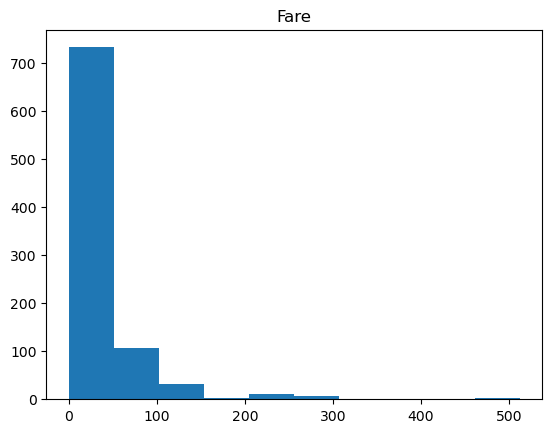

In [16]:
df_num = df[['Age','SibSp','Parch','Fare']] # numerical values
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']] # categorical values
#plotting numerical data to check whether the data is in normal distribution or not.
for i in df_num.columns:
 plt.hist(df_num[i])
 plt.title(i)
 plt.show()

<Axes: >

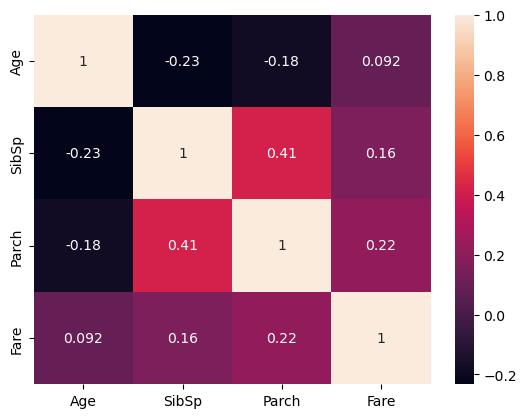

In [17]:
corr=df_num.corr()
sns.heatmap(corr,annot=True)

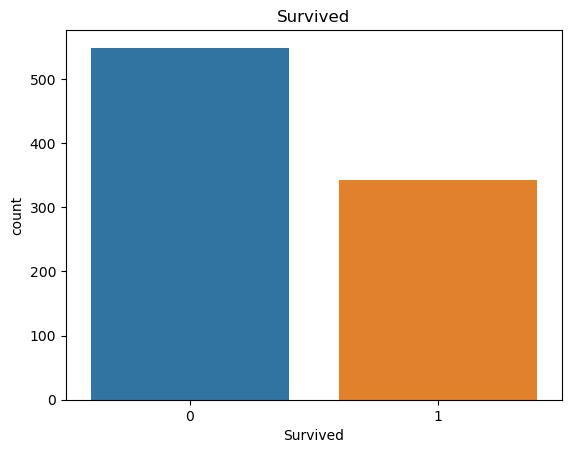

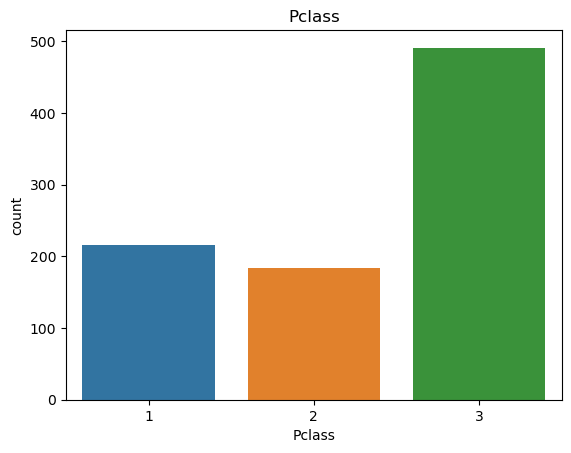

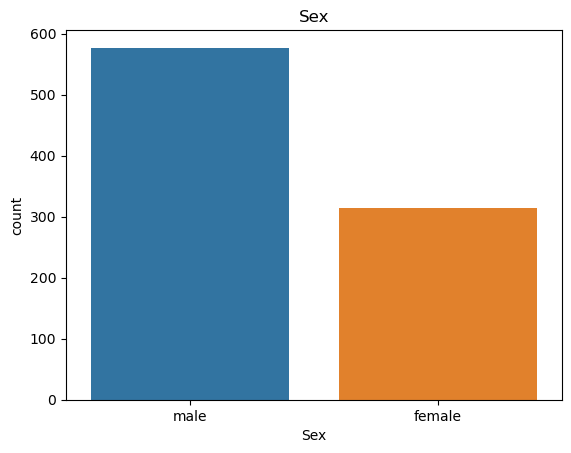

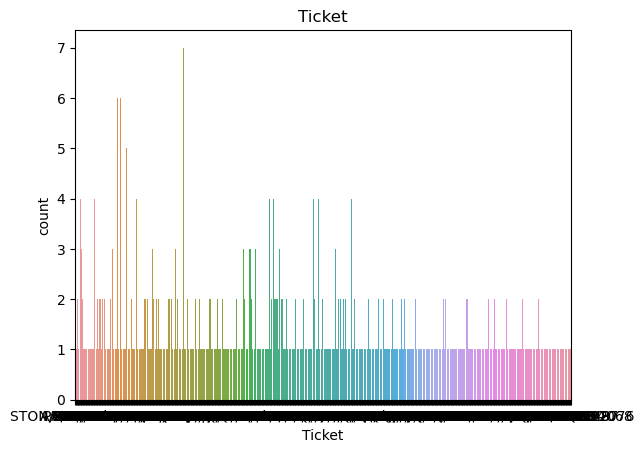

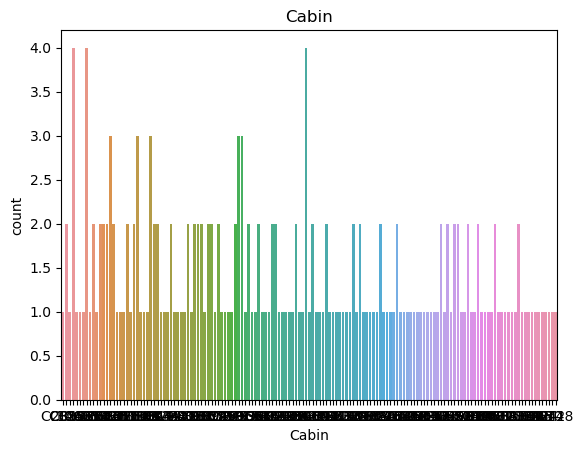

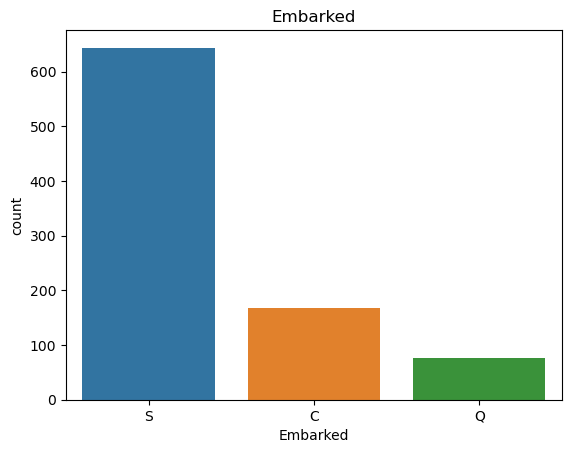

In [18]:
#bar plot for categorical data
for i in df_cat.columns:
 sns.countplot(x=i, data=df_cat)
 plt.title(i)
 plt.show()

# Step-5: outliers detection

<Axes: xlabel='Fare'>

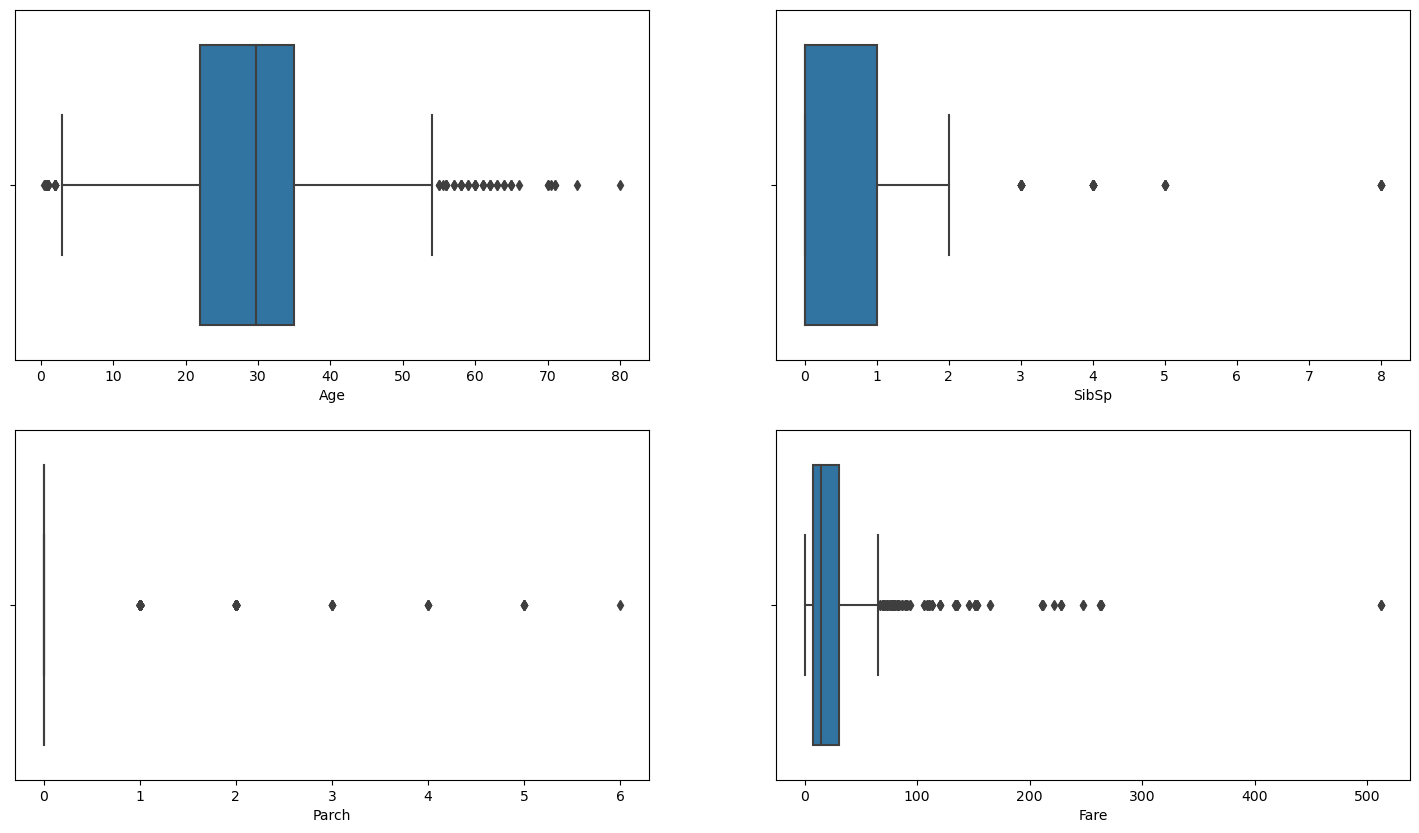

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], x="Age", data=df)
sns.boxplot(ax=axes[0, 1], x="SibSp", data=df)
sns.boxplot(ax=axes[1, 0], x="Parch", data=df)
sns.boxplot(ax=axes[1, 1], x="Fare", data=df)

# Step-6: separating dependent and independent variables

In [20]:
#891,12
x=df.iloc[:,4:12]
x.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,female,35.0,1,0,113803,53.1000,C123,S
4,male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
y=df.iloc[:,1:2]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Step-7: encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
x["Sex"]=le.fit_transform(x["Sex"])
x["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [25]:
#label encoding for odinal data
df['Pclass'] = le.fit_transform(df['Pclass'])

In [26]:
#one hot encoding for nominal data
f = pd.get_dummies(df, columns=['Sex', 'Embarked'])

# Step-8: splitting into training and testing dataset

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 11), (179, 11), (712,), (179,))

# Step-9: feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [30]:
# Standardization(Z-score)
df[['Age', 'Fare']] = sc.fit_transform(df[['Age', 'Fare']])

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,"Partner, Mr. Austen",male,1.215947,0,0,113043,-0.074583,C124,S
733,734,1,"Berriman, Mr. William John",male,-0.515526,0,0,28425,-0.386671,NaN,S
382,383,2,"Tikkanen, Mr. Juho",male,0.177063,0,0,STON/O 2. 3101293,-0.488854,NaN,S
704,705,2,"Hansen, Mr. Henrik Juul",male,-0.284663,1,0,350025,-0.490280,NaN,S
813,814,2,"Andersson, Miss. Ebba Iris Alfrida",female,-1.823750,4,2,347082,-0.018709,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
106,107,2,"Salkjelsvik, Miss. Anna Kristine",female,-0.669435,0,0,343120,-0.494391,NaN,S
270,271,0,"Cairns, Mr. Alexander",male,0.000000,0,0,113798,-0.024246,NaN,S
860,861,2,"Hansen, Mr. Claus Peter",male,0.869652,2,0,350026,-0.364355,NaN,S
435,436,0,"Carter, Miss. Lucile Polk",female,-1.208115,1,2,113760,1.767741,B96 B98,S


In [33]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64